In [ ]:
import pandas as pd
import kagglehub

# Download the dataset from Kaggle
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

# Load the CSV file (usually it's named something like "data.csv" or similar)
file_path = f"{path}/data.csv"  # Adjust if filename is different
df = pd.read_csv(file_path)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#Drop non-numeric or irrelevant columns
df = df.drop(columns=["id", "Unnamed: 32"], errors='ignore')

# Save target column separately for future use
target = df["diagnosis"]
df = df.drop(columns=["diagnosis"])

In [ ]:
# Scale the numeric features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Convert scaled data back to DataFrame for ease of use
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

# Show shape and few rows of scaled data
print("\nScaled Dataset Shape:", df_scaled.shape)
df_scaled.head()



Scaled Dataset Shape: (569, 30)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
# Select one column to analyze
feature = "radius_mean"
data_col = df_scaled[feature]

# 1. Z-score method
z_scores = (data_col - data_col.mean()) / data_col.std()
z_threshold = 3
z_outliers = df_scaled[np.abs(z_scores) > z_threshold]

print(f"\nZ-Score Method:")
print(f"Threshold: ±{z_threshold}")
print(f"Outliers detected: {z_outliers.shape[0]}")


Z-Score Method:
Threshold: ±3
Outliers detected: 5


In [ ]:
# 2. IQR method
Q1 = data_col.quantile(0.25)
Q3 = data_col.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
iqr_outliers = df_scaled[(data_col < lower_bound) | (data_col > upper_bound)]

print(f"\nIQR Method:")
print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
print(f"Outliers detected: {iqr_outliers.shape[0]}")


IQR Method:
Lower Bound: -2.43, Upper Bound: 2.21
Outliers detected: 14


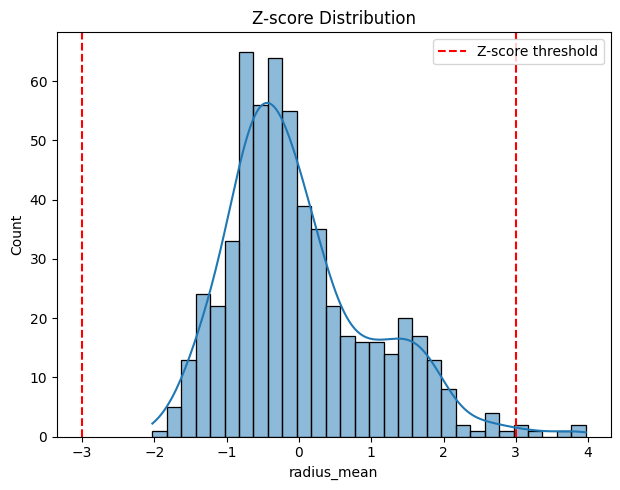

In [ ]:
#Plot distributions and outliers
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
sns.histplot(z_scores, bins=30, kde=True)
plt.axvline(z_threshold, color='r', linestyle='--', label='Z-score threshold')
plt.axvline(-z_threshold, color='r', linestyle='--')
plt.title('Z-score Distribution')
plt.legend()

plt.tight_layout()
plt.show()


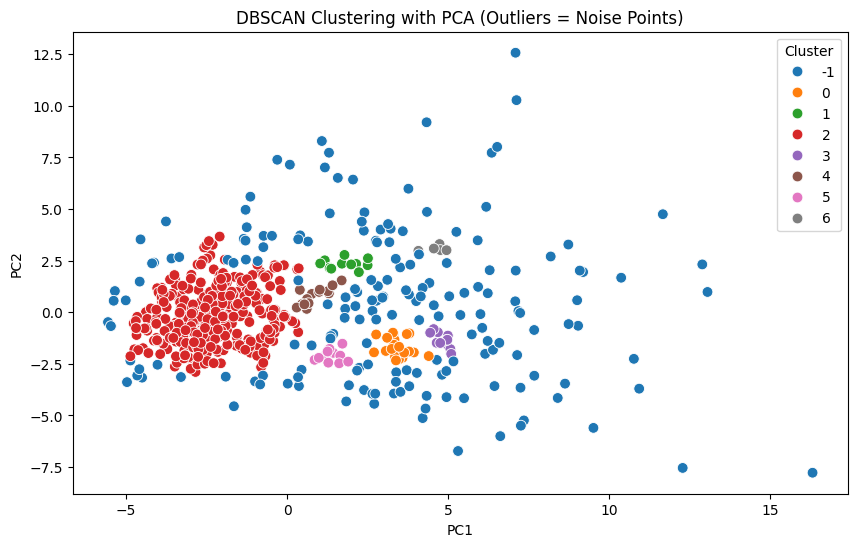

Number of outliers detected by DBSCAN (noise points): 179


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: PCA to reduce to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])

# Step 2: Apply DBSCAN (dense clusters identify labels anomlaies as -1)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_df)

# Step 3: Add labels to DataFrame
pca_df["Cluster"] = dbscan_labels

# Step 4: Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", palette="tab10", s=60)
plt.title("DBSCAN Clustering with PCA (Outliers = Noise Points)")
plt.legend(title="Cluster")
plt.show()

# Count noise points (label = -1)
n_outliers = sum(dbscan_labels == -1)
print(f"Number of outliers detected by DBSCAN (noise points): {n_outliers}")


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# 1. Isolation Forest (random partitioning and detect outliers)
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_labels = iso_forest.fit_predict(df_scaled)
iso_outliers = (iso_labels == -1)
print(f"Isolation Forest: {np.sum(iso_outliers)} outliers detected.")

# 2. Local Outlier Factor
sampled_df = df_scaled.sample(n=min(10000, len(df_scaled)), random_state=42)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
lof_labels = lof.fit_predict(sampled_df)
lof_outliers = (lof_labels == -1)
print(f"Local Outlier Factor: {np.sum(lof_outliers)} outliers detected (sample size = {len(sampled_df)})")

# 3. One-Class SVM  (detects normal region of data and flags anything outside)
oc_svm = OneClassSVM(nu=0.05, kernel="rbf", gamma='scale')
svm_labels = oc_svm.fit_predict(df_scaled)
svm_outliers = (svm_labels == -1)
print(f"One-Class SVM: {np.sum(svm_outliers)} outliers detected.")


Isolation Forest: 29 outliers detected.
Local Outlier Factor: 29 outliers detected (sample size = 569)
One-Class SVM: 35 outliers detected.


In [ ]:
# Collect all results into a dictionary
results = {
    "Z-Score (radius_mean)": len(z_outliers),
    "IQR (radius_mean)": len(iqr_outliers),
    "DBSCAN (PCA 2D)": n_outliers,
    "Isolation Forest": np.sum(iso_outliers),
    "Local Outlier Factor (sample)": np.sum(lof_outliers),
    "One-Class SVM": np.sum(svm_outliers)
}

# Display comparison table
results_df = pd.DataFrame(list(results.items()), columns=["Method", "Outliers Detected"])
print("\nOutlier Detection Comparison:")
print(results_df.sort_values(by="Outliers Detected", ascending=False))



Outlier Detection Comparison:
                          Method  Outliers Detected
2                DBSCAN (PCA 2D)                179
5                  One-Class SVM                 35
3               Isolation Forest                 29
4  Local Outlier Factor (sample)                 29
1              IQR (radius_mean)                 14
0          Z-Score (radius_mean)                  5


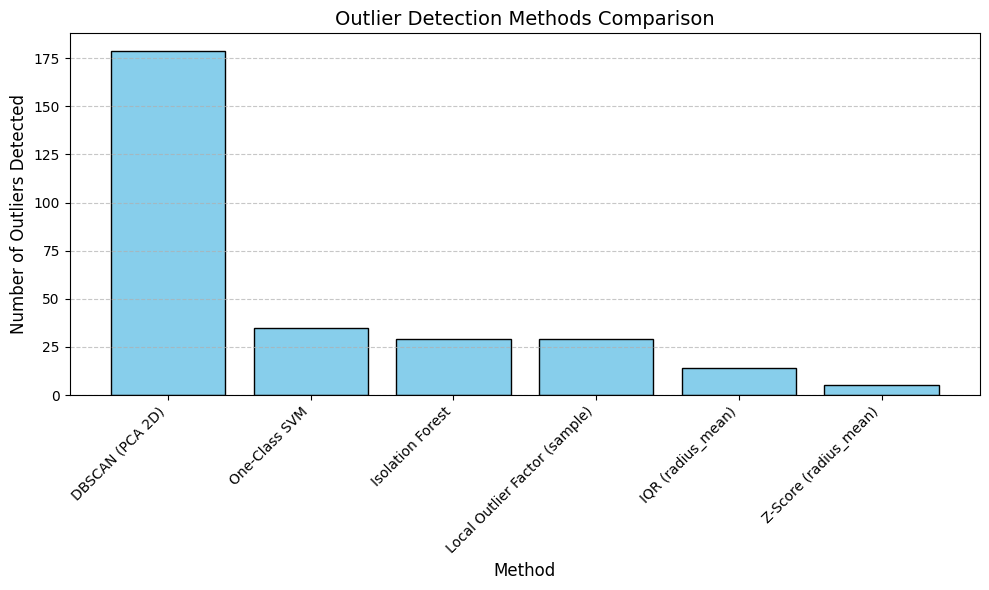

In [ ]:
import matplotlib.pyplot as plt

# Sort results for consistent visualization
sorted_results = results_df.sort_values(by="Outliers Detected", ascending=False)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(sorted_results["Method"], sorted_results["Outliers Detected"], color='skyblue', edgecolor='black')
plt.title("Outlier Detection Methods Comparison", fontsize=14)
plt.xlabel("Method", fontsize=12)
plt.ylabel("Number of Outliers Detected", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
